In [226]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd

In [227]:
ctx = straxbra.XebraContext()

In [228]:
run = '00193'
peaks_data = ctx.get_array(run, 'peaks')

In [229]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
area_per_channel = peaks_data['area_per_channel']
risetime = -peaks_data['area_decile_from_midpoint'][:,1]

In [230]:
def CutCondition(waveform):
    
    
    FirstPeak_area = sum(waveform[:15]) # range in samples (not ns!)
    SecondPeak_area = sum(waveform[15:]) # range in samples (not ns!)

    
    if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
#        print (i , secondS1_area, secondS1_peaktime)
        return(True)
    else:
        return(False)
    

In [231]:
def S2_found(integral, width):
    if integral > 500 and width >200 and width < 2000:
        return True
    else:
        return False

In [232]:
def Process(waveform, i):
    CutFlag = CutCondition(waveform[i])
    if CutFlag == True:
        Timestamps_kr_events.append(timestamp[i])
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 65000
        while threshold_timestamp >= counter_timestamp and S2_found(integral = integral[i+j], width = width[i+j]) == False: 
            j += 1
            counter_timestamp = timestamp[i+j]           
        else:
            if S2_found(integral = integral[i+j], width = width[i+j]):
                    #PrintWaveform(waveform[i+j])
                kr_s1_area.append(integral[i])
                kr_s1_width.append(width[i])
                kr_s1_risetime.append(risetime[i])
                kr_s2_area.append(integral[i+j])
                kr_s2_width.append(width[i+j])
                kr_s2_risetime.append(risetime[i+j])
                kr_s2_drifttime.append(counter_timestamp - timestamp[i])
                    
                return
            else:
                return

In [233]:
num = len(waveform)

kr_s1_area = []
kr_s1_width = []
kr_s1_risetime = []
kr_s2_area = []
kr_s2_width = []
kr_s2_risetime = []
kr_s2_drifttime = []
Timestamps_kr_events = []

print_counter = 0.0
for i in range(0,num):
    
    Process(waveform,i)
    
    if i/num >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1
        
print(1.0)

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


In [234]:
S1_area = np.array(kr_s1_area)
S2_area = np.array(kr_s2_area)
S1_S2_ratio = S1_area/S2_area 

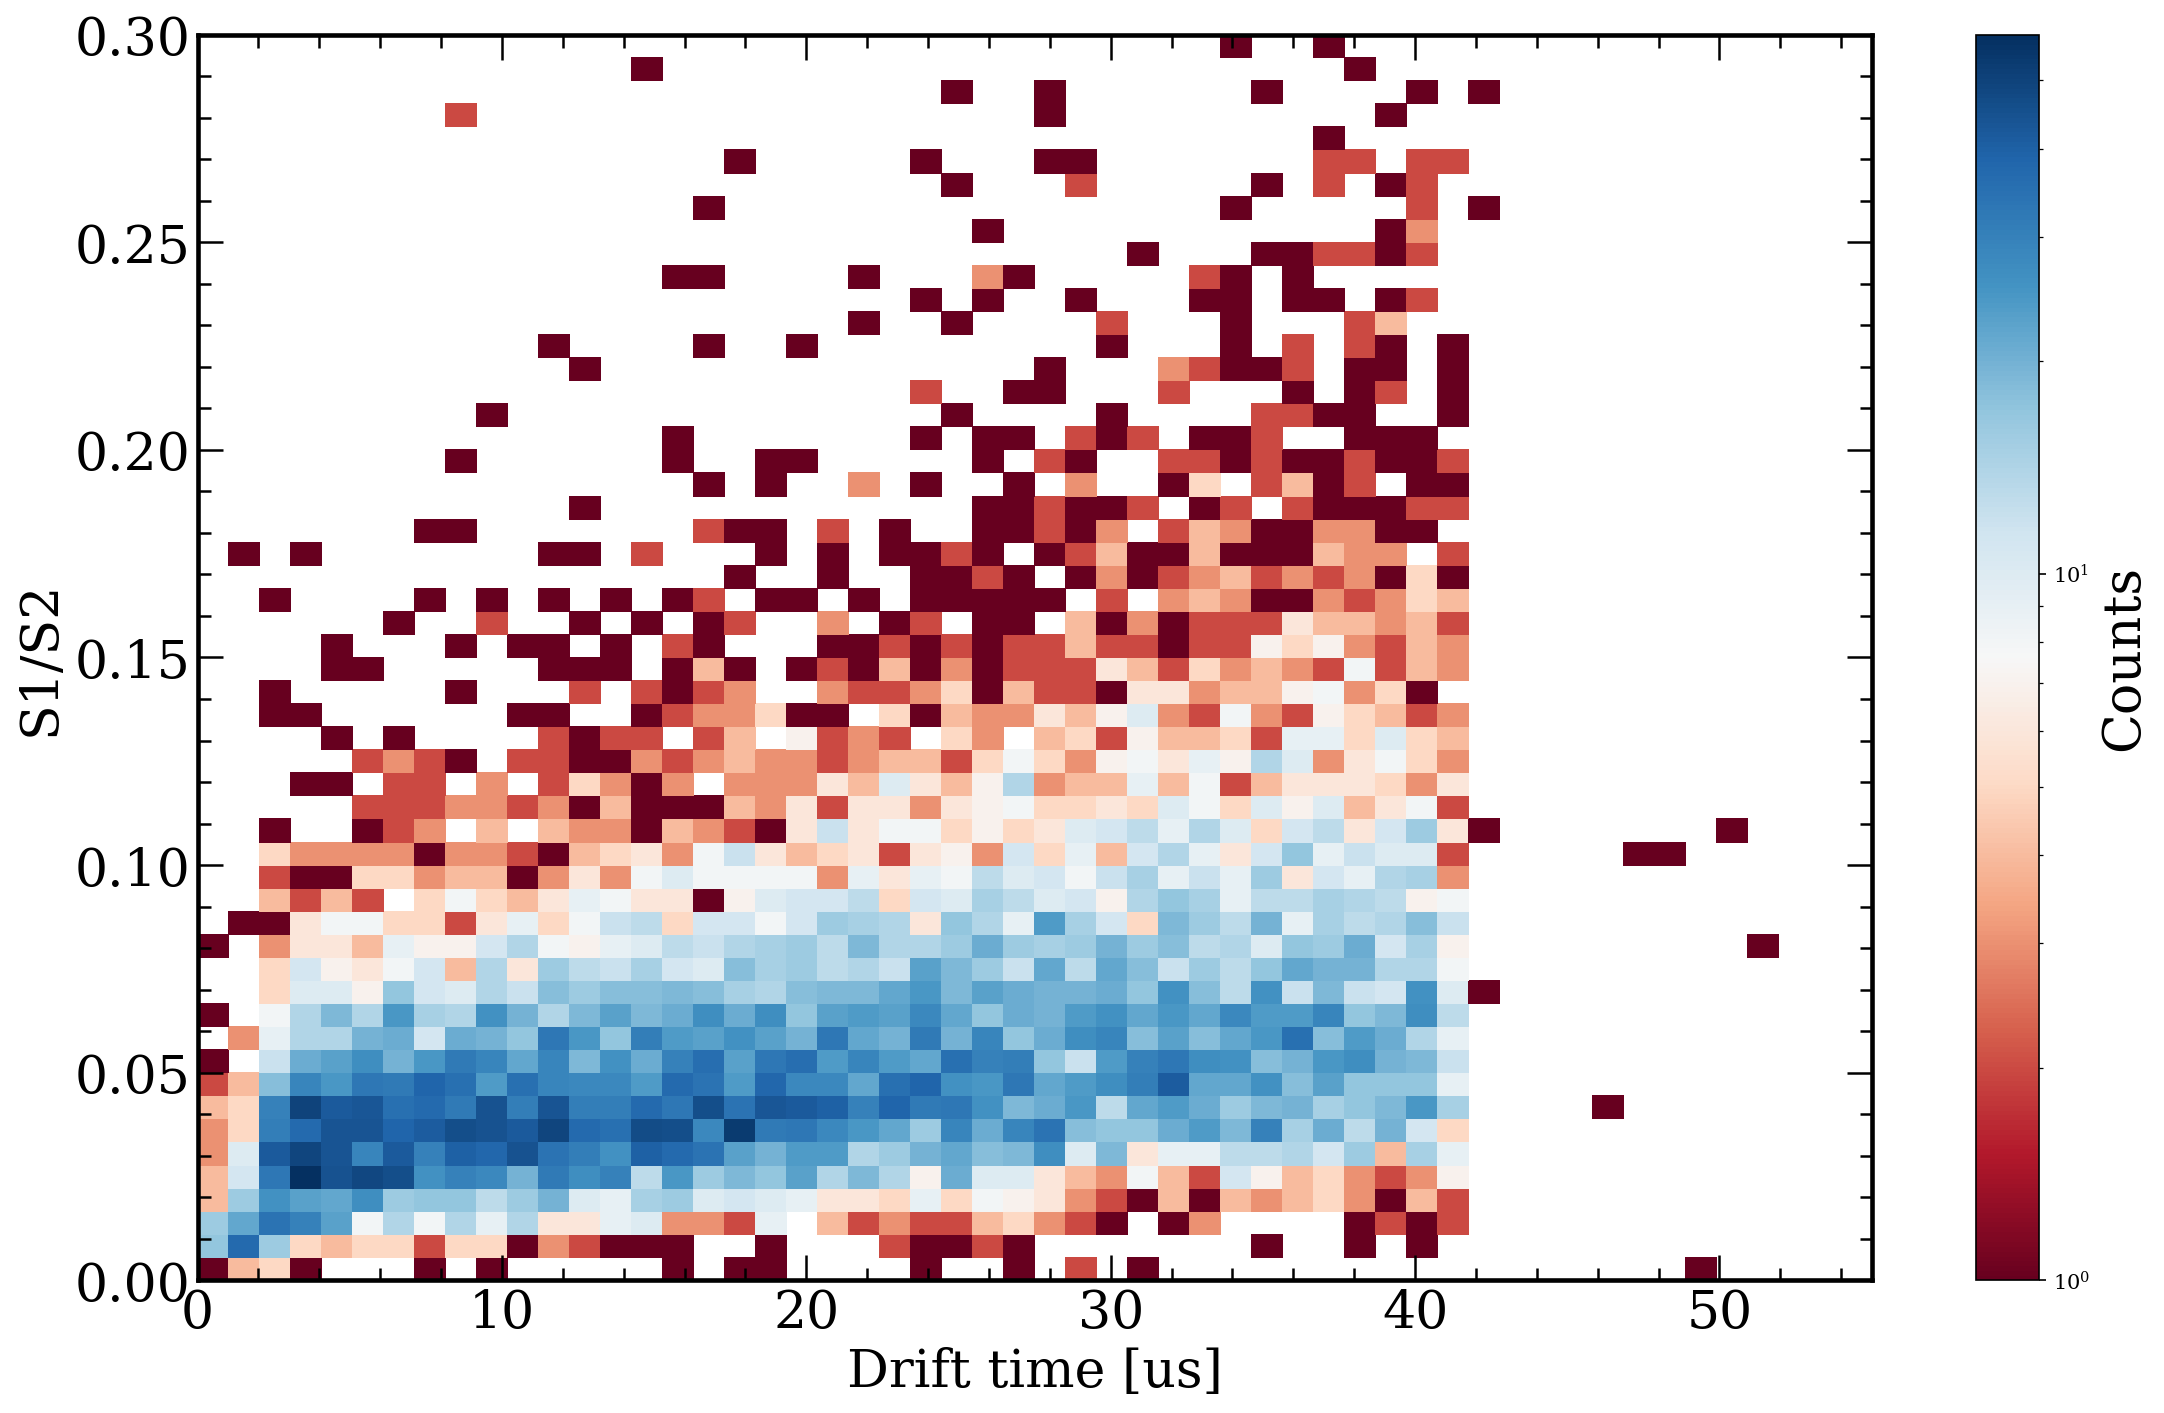

In [236]:
fig=plt.figure(figsize=(18, 11), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)


bins_x = np.linspace(0,55,55)
bins_y = np.linspace(0,0.3,55)
counts, xedges, yedges = np.histogram2d(kr_s2_drifttime/1e3, S1_S2_ratio, bins=(bins_x, bins_y))

im = axes.pcolormesh(bins_x, bins_y, counts.T, norm=LogNorm(), cmap = 'RdBu')
plt.colorbar(im,ax=axes, label='Counts')
#ax.set_yscale('log')

axes.set_xlabel('Drift time [us]')
axes.set_ylabel('S1/S2')
plt.show()

In [237]:
xcenter = ((xedges[:-1]+xedges[1:])/2)
ycenter = ((yedges[:-1]+yedges[1:])/2)

[3.67429291e+01 2.92785804e-02 1.69292272e-02]
[4.89348652e+01 3.36972319e-02 1.58625317e-02]
[4.41324485e+01 3.52477528e-02 1.63057167e-02]
[4.31077531e+01 3.74859318e-02 1.65071072e-02]
[3.88518030e+01 3.89063972e-02 1.94410077e-02]
[3.84368344e+01 4.01587886e-02 1.59591693e-02]
[4.09165329e+01 3.92893005e-02 1.68822281e-02]
[3.83330222e+01 4.20975728e-02 1.93112326e-02]
[3.72058925e+01 4.01265115e-02 1.77578671e-02]
[4.11557008e+01 4.20170528e-02 1.86772022e-02]
[3.12587358e+01 4.40629270e-02 2.09475678e-02]
[3.03774701e+01 4.52811769e-02 2.23404977e-02]
[3.42683757e+01 4.46951364e-02 2.13988257e-02]
[3.85793361e+01 4.37090919e-02 1.90846406e-02]
[3.78564542e+01 4.69213078e-02 1.84609532e-02]
[3.18618506e+01 4.72421363e-02 2.23029873e-02]
[3.54050871e+01 4.82044033e-02 2.01415513e-02]
[3.27620237e+01 4.81910798e-02 2.14481699e-02]
[3.10847195e+01 5.12028072e-02 2.23961548e-02]
[25.82685794  0.05601013  0.02681823]
[2.93226781e+01 5.15120493e-02 2.16150326e-02]
[3.13804564e+01 5.5437

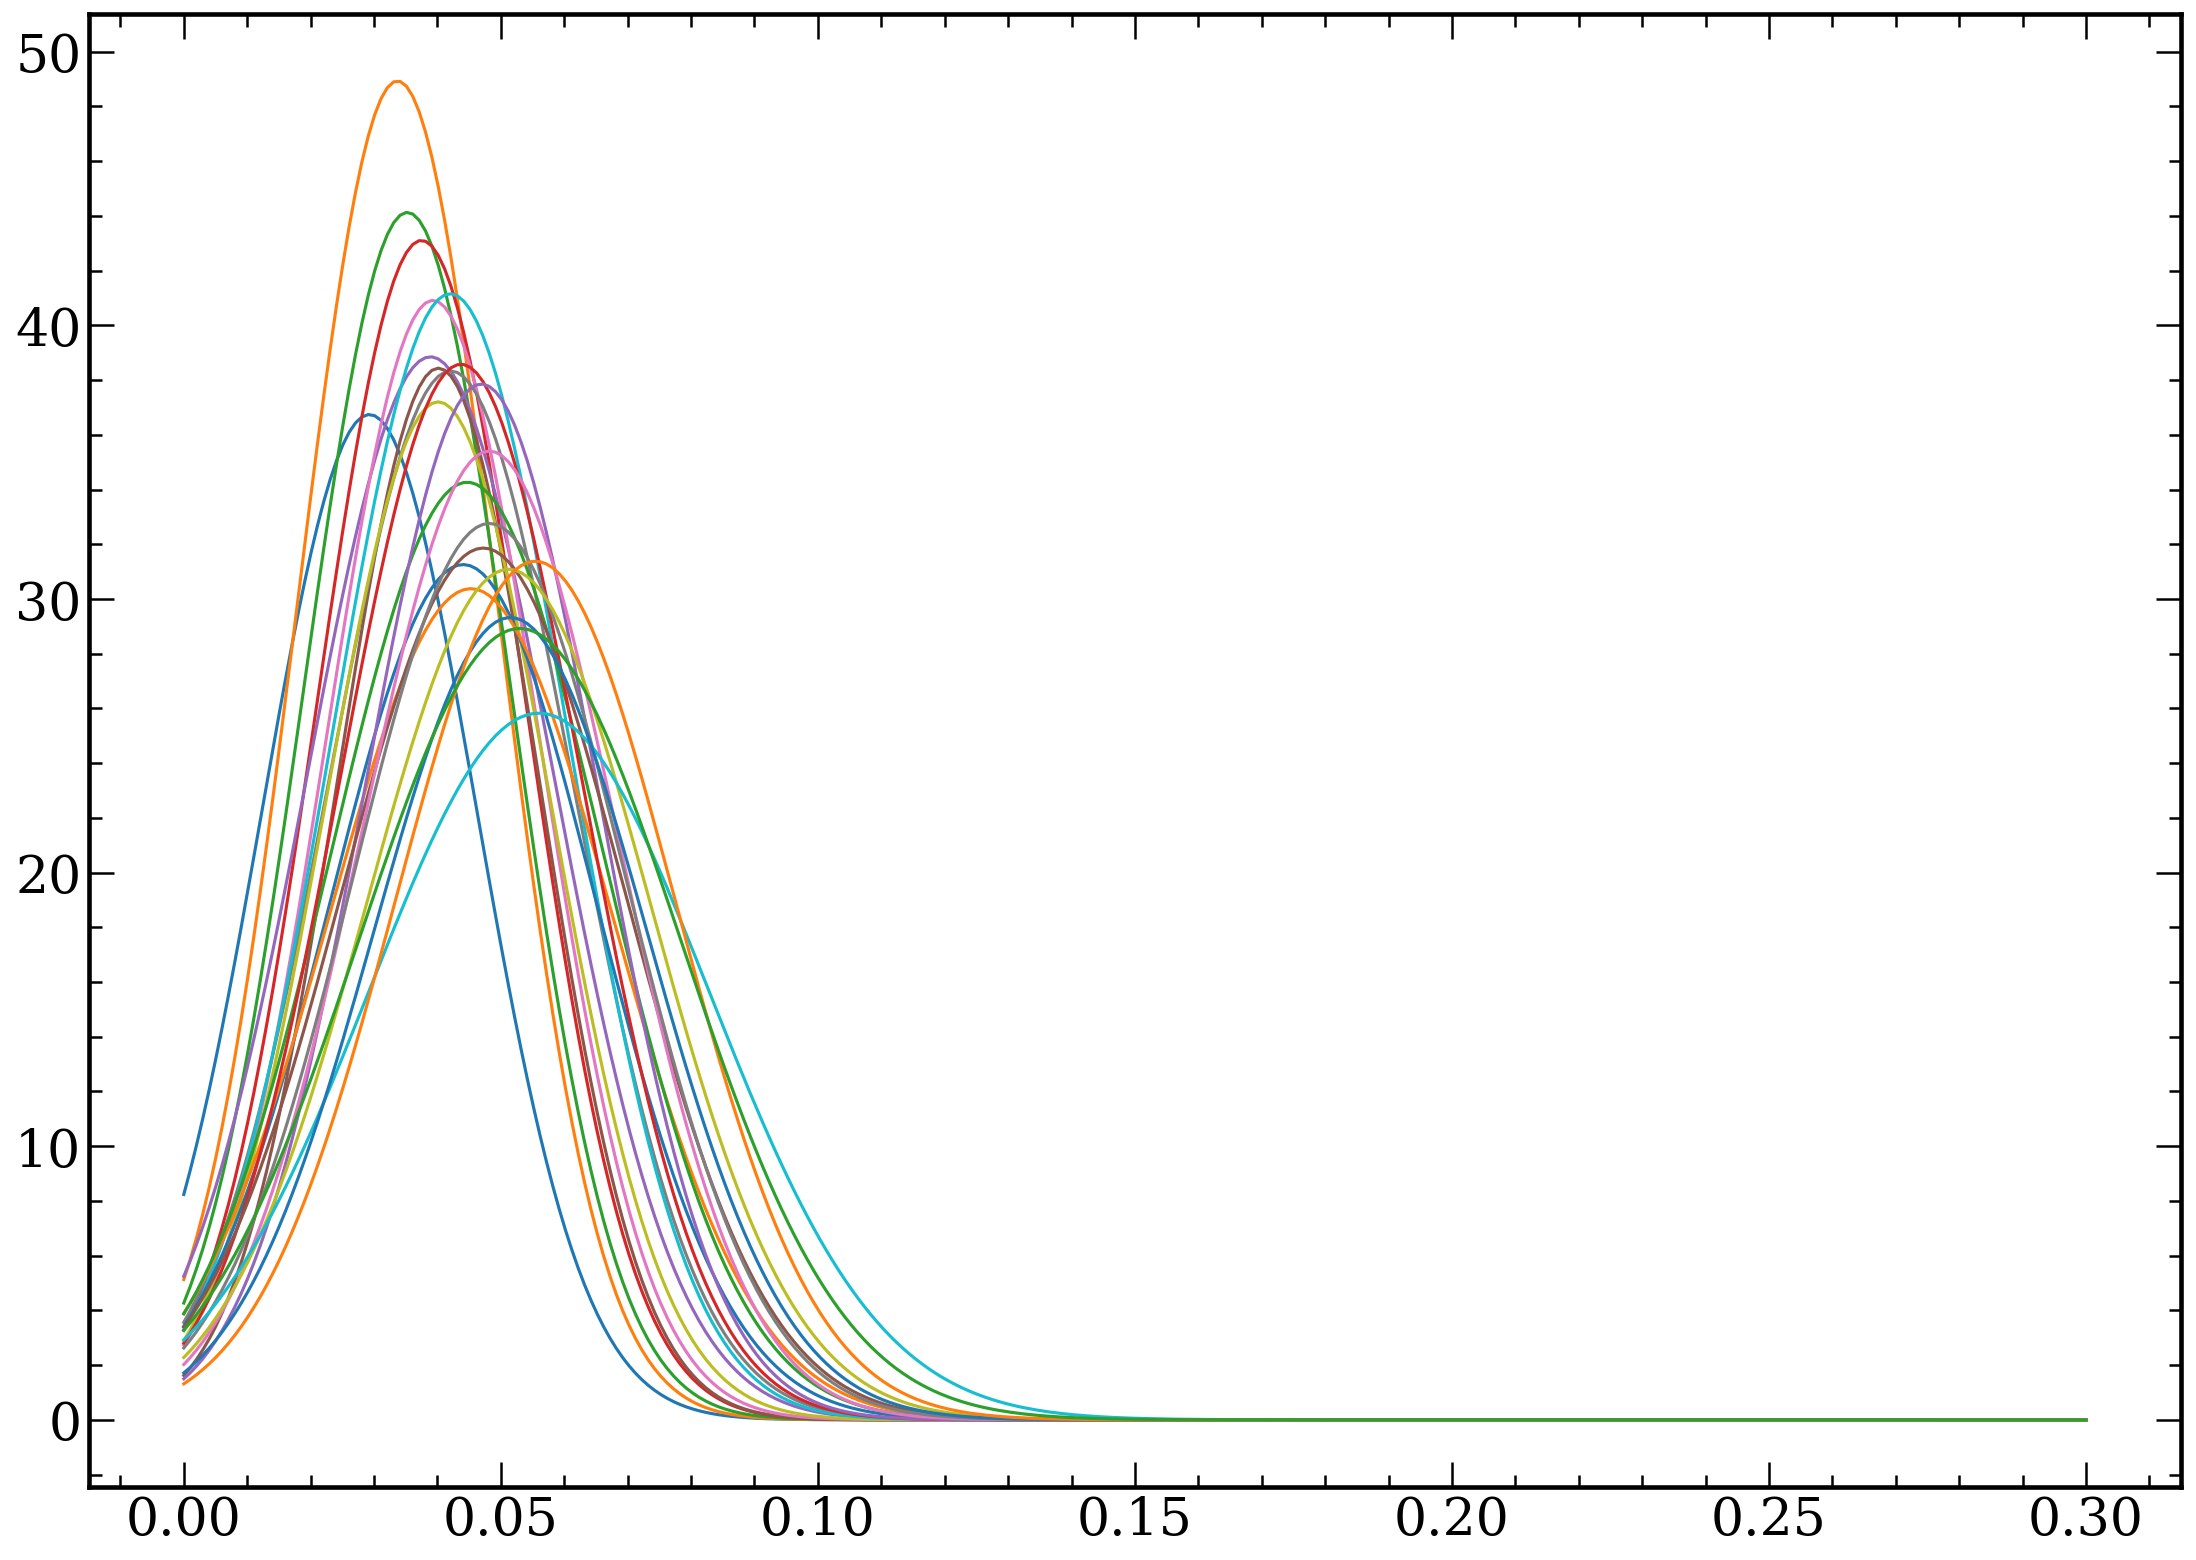

In [238]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(18, 13), dpi=150)

# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

fit_range= np.linspace(0,0.3,300)

def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus
p0 = [25,0.06,0.01]
mu_list = []
mu_error_list = []
# popt, pcov = curve_fit(single_gaus, ycenter, counts[25], p0)
# plt.scatter(ycenter, counts[25], c = 'r', marker = 'x')
# plt.plot(fit_range, single_gaus(fit_range, *popt))
# ax.set_xscale('log')
ax.set_title('Fit for each drift time slice - log(gaus) fit', fontsize = 20)
ax.set_xlabel('S2 area [PE]', fontsize = 20)
ax.set_ylabel('counts[#]', fontsize = 20)
for i in range(2,25):   
    popt, pcov = curve_fit(single_gaus, ycenter, counts[i], p0)
    plt.plot(fit_range, single_gaus(fit_range, *popt))
    print(popt)
    value = popt[1]
#     #value = np.exp(popt[1]+((popt[2]**2)/2))
    mu_list.append(value)
    perr = np.sqrt(np.diag(pcov))
    error_mu = perr[1]
#     #error_mu = np.exp(popt[1])*error_ln_mu
    mu_error_list.append(error_mu)


#print(mu_list)
plt.show()

0.97


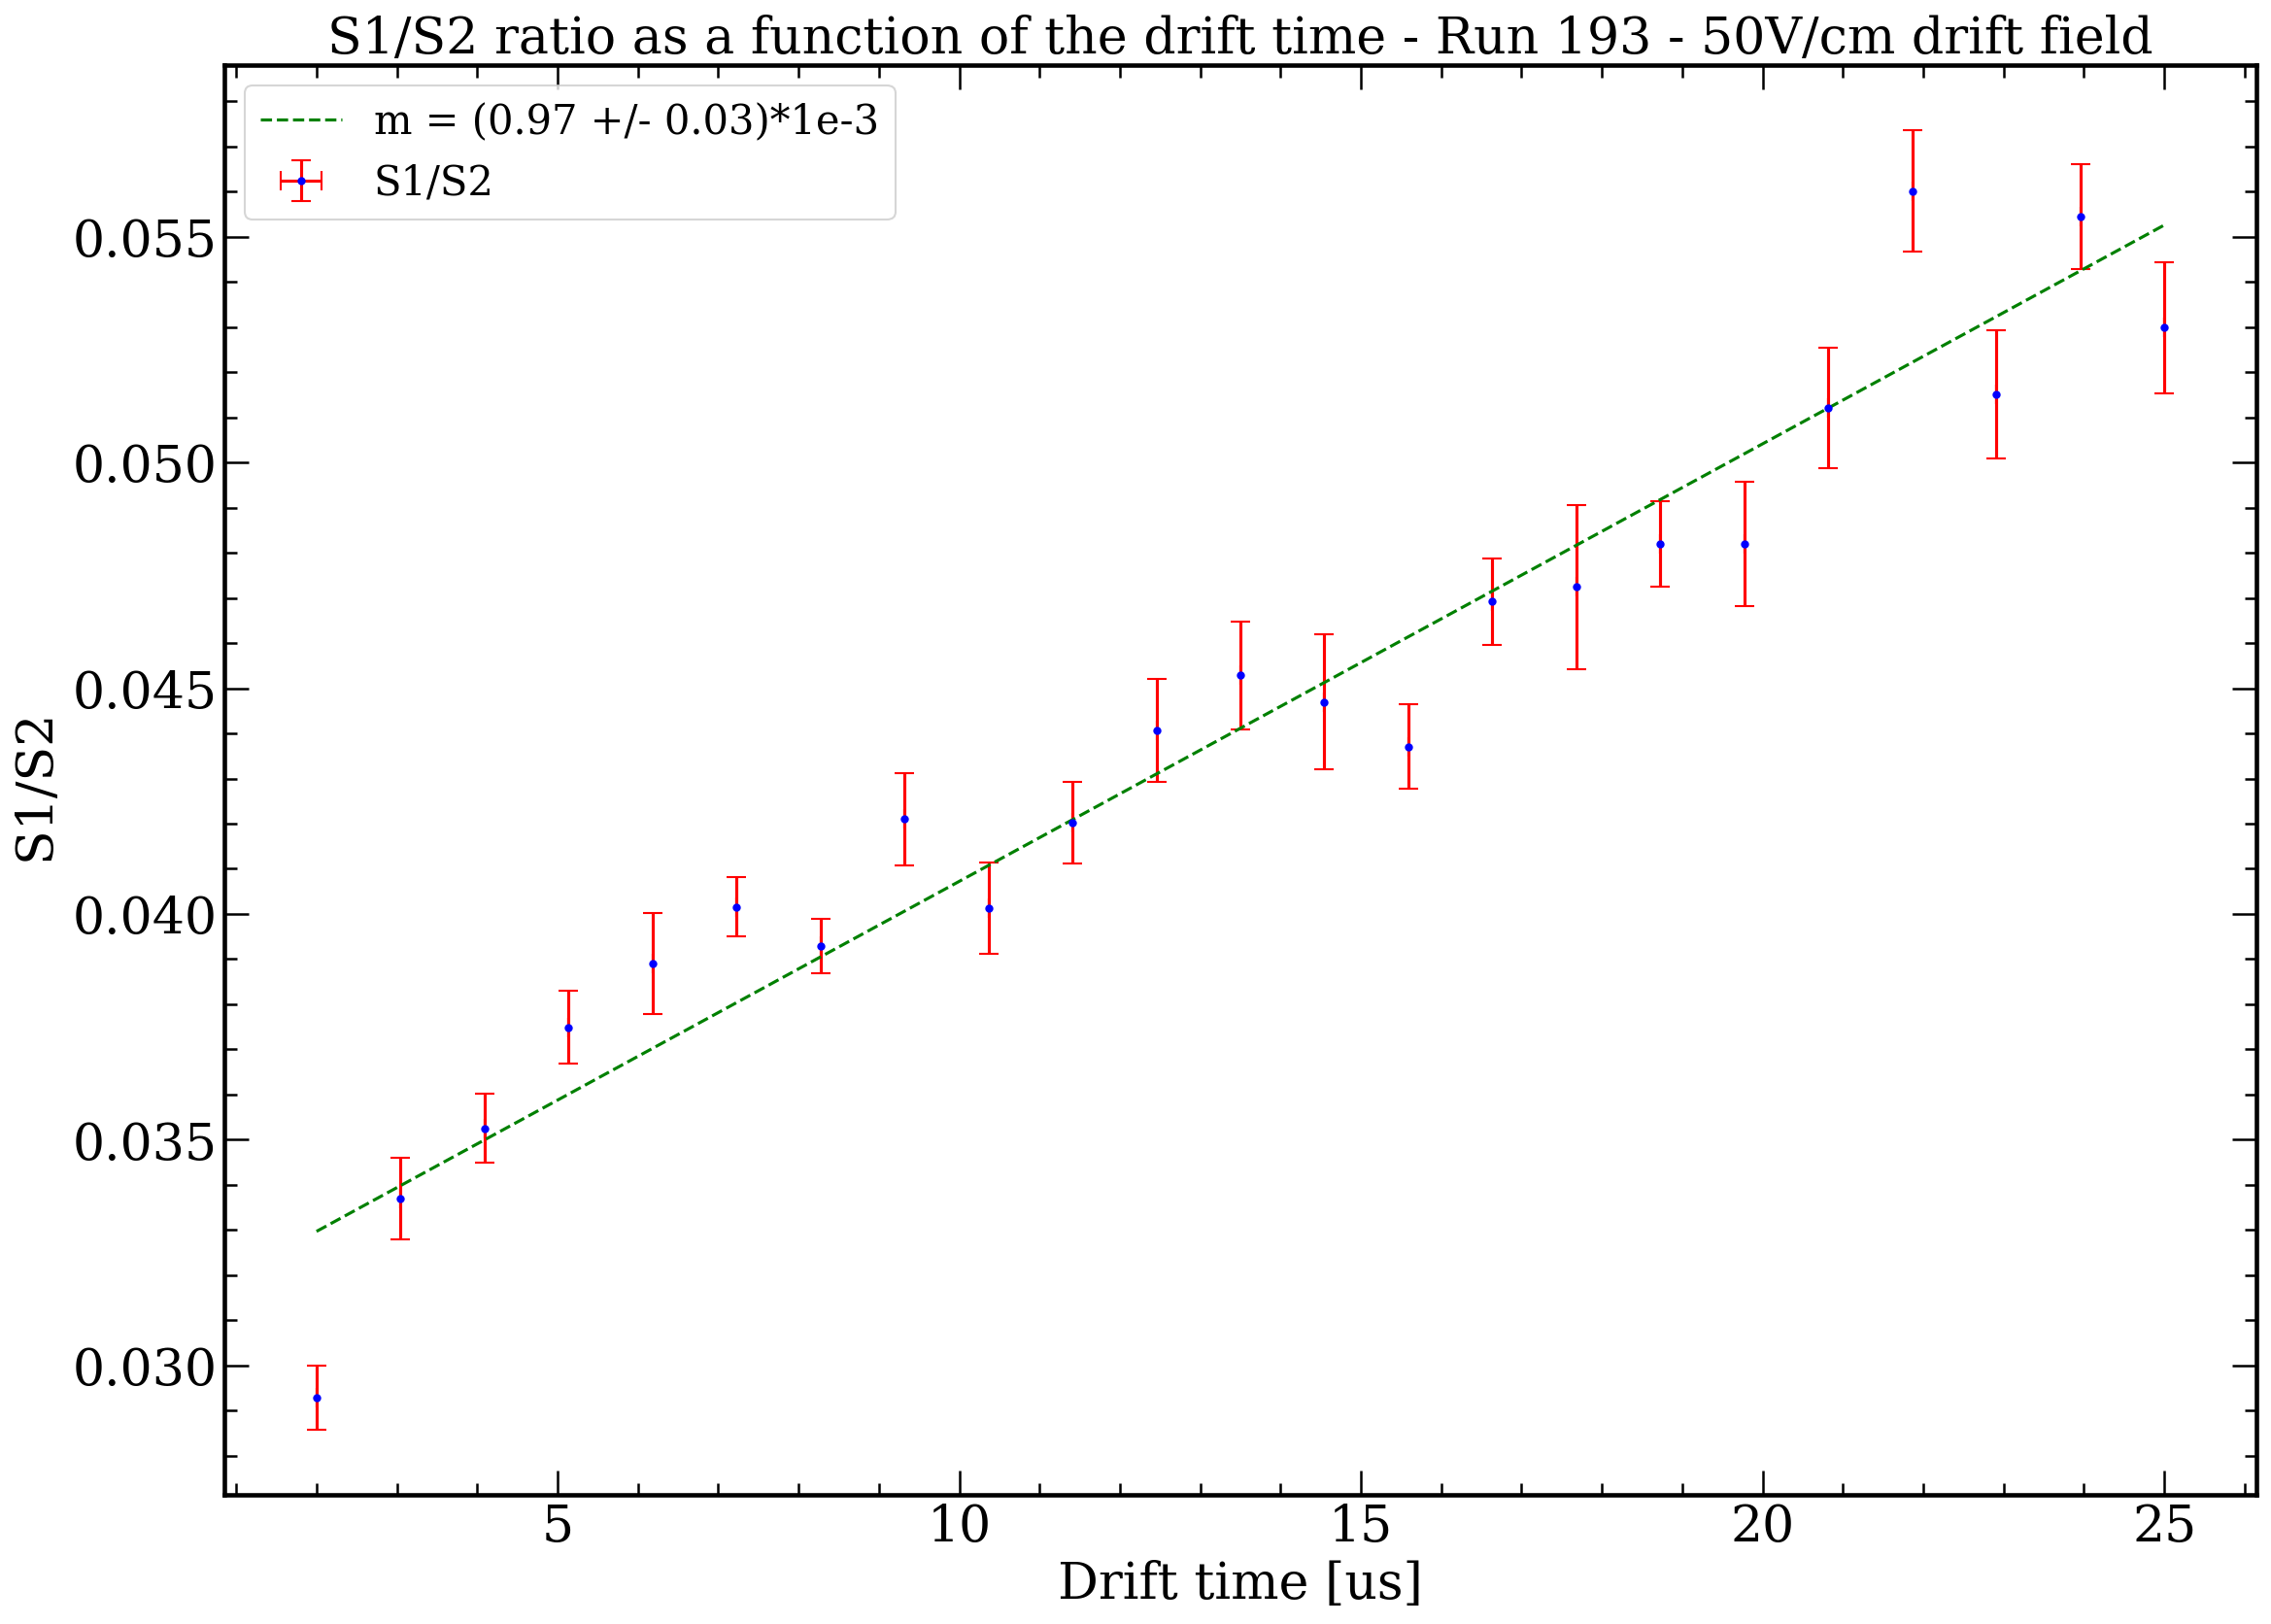

In [239]:
fig=plt.figure(figsize=(18, 13), dpi=150)

plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
   

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)



def linear(x, a, b):
    return a*x+b

p0=  [0.1,0]
x = np.linspace(2,25,23)
y_values = mu_list
y_error = mu_error_list
bin_fullwidths = (x[1:] - x[:-1])
# print(x)
# print(len(x))

# print(bin_fullwidths)
# print(len(bin_fullwidths))

popt, pcov = curve_fit(linear, x, y_values, sigma=y_error, p0=p0, absolute_sigma=True, maxfev= 10000)
perr = np.sqrt(np.diag(pcov))
m = "%.2f" % (popt[0]*1e3)
# m = m /1e3
#print(perr)
m_error = "%.2f" % (perr[0]*1e3)

plt.errorbar(x, y_values, yerr=y_error, xerr=0,marker= '.', ecolor='red', capsize=5, fmt = 'bx', label = 'S1/S2' )

# print('this is lamba: ', popt[1])
# print('this is 1/lamba: ', 1/popt[1] )
plt.plot(x, linear(x, *popt), 'g--', label = 'm = '+'('+str(m)+' +/- ' +str(m_error)+')'+'*1e-3')
print(m)


#ax.set_ylim([130,250])
axes.set_title('S1/S2 ratio as a function of the drift time - Run '+run[2:]+' - 50V/cm drift field')
axes.set_xlabel('Drift time [us]')
axes.set_ylabel('S1/S2 ')


# print('electron lifetime: ', lifetime, '+/-', lifetime_error)

# print(perr)
plt.legend(prop={'size': 20})
plt.show()


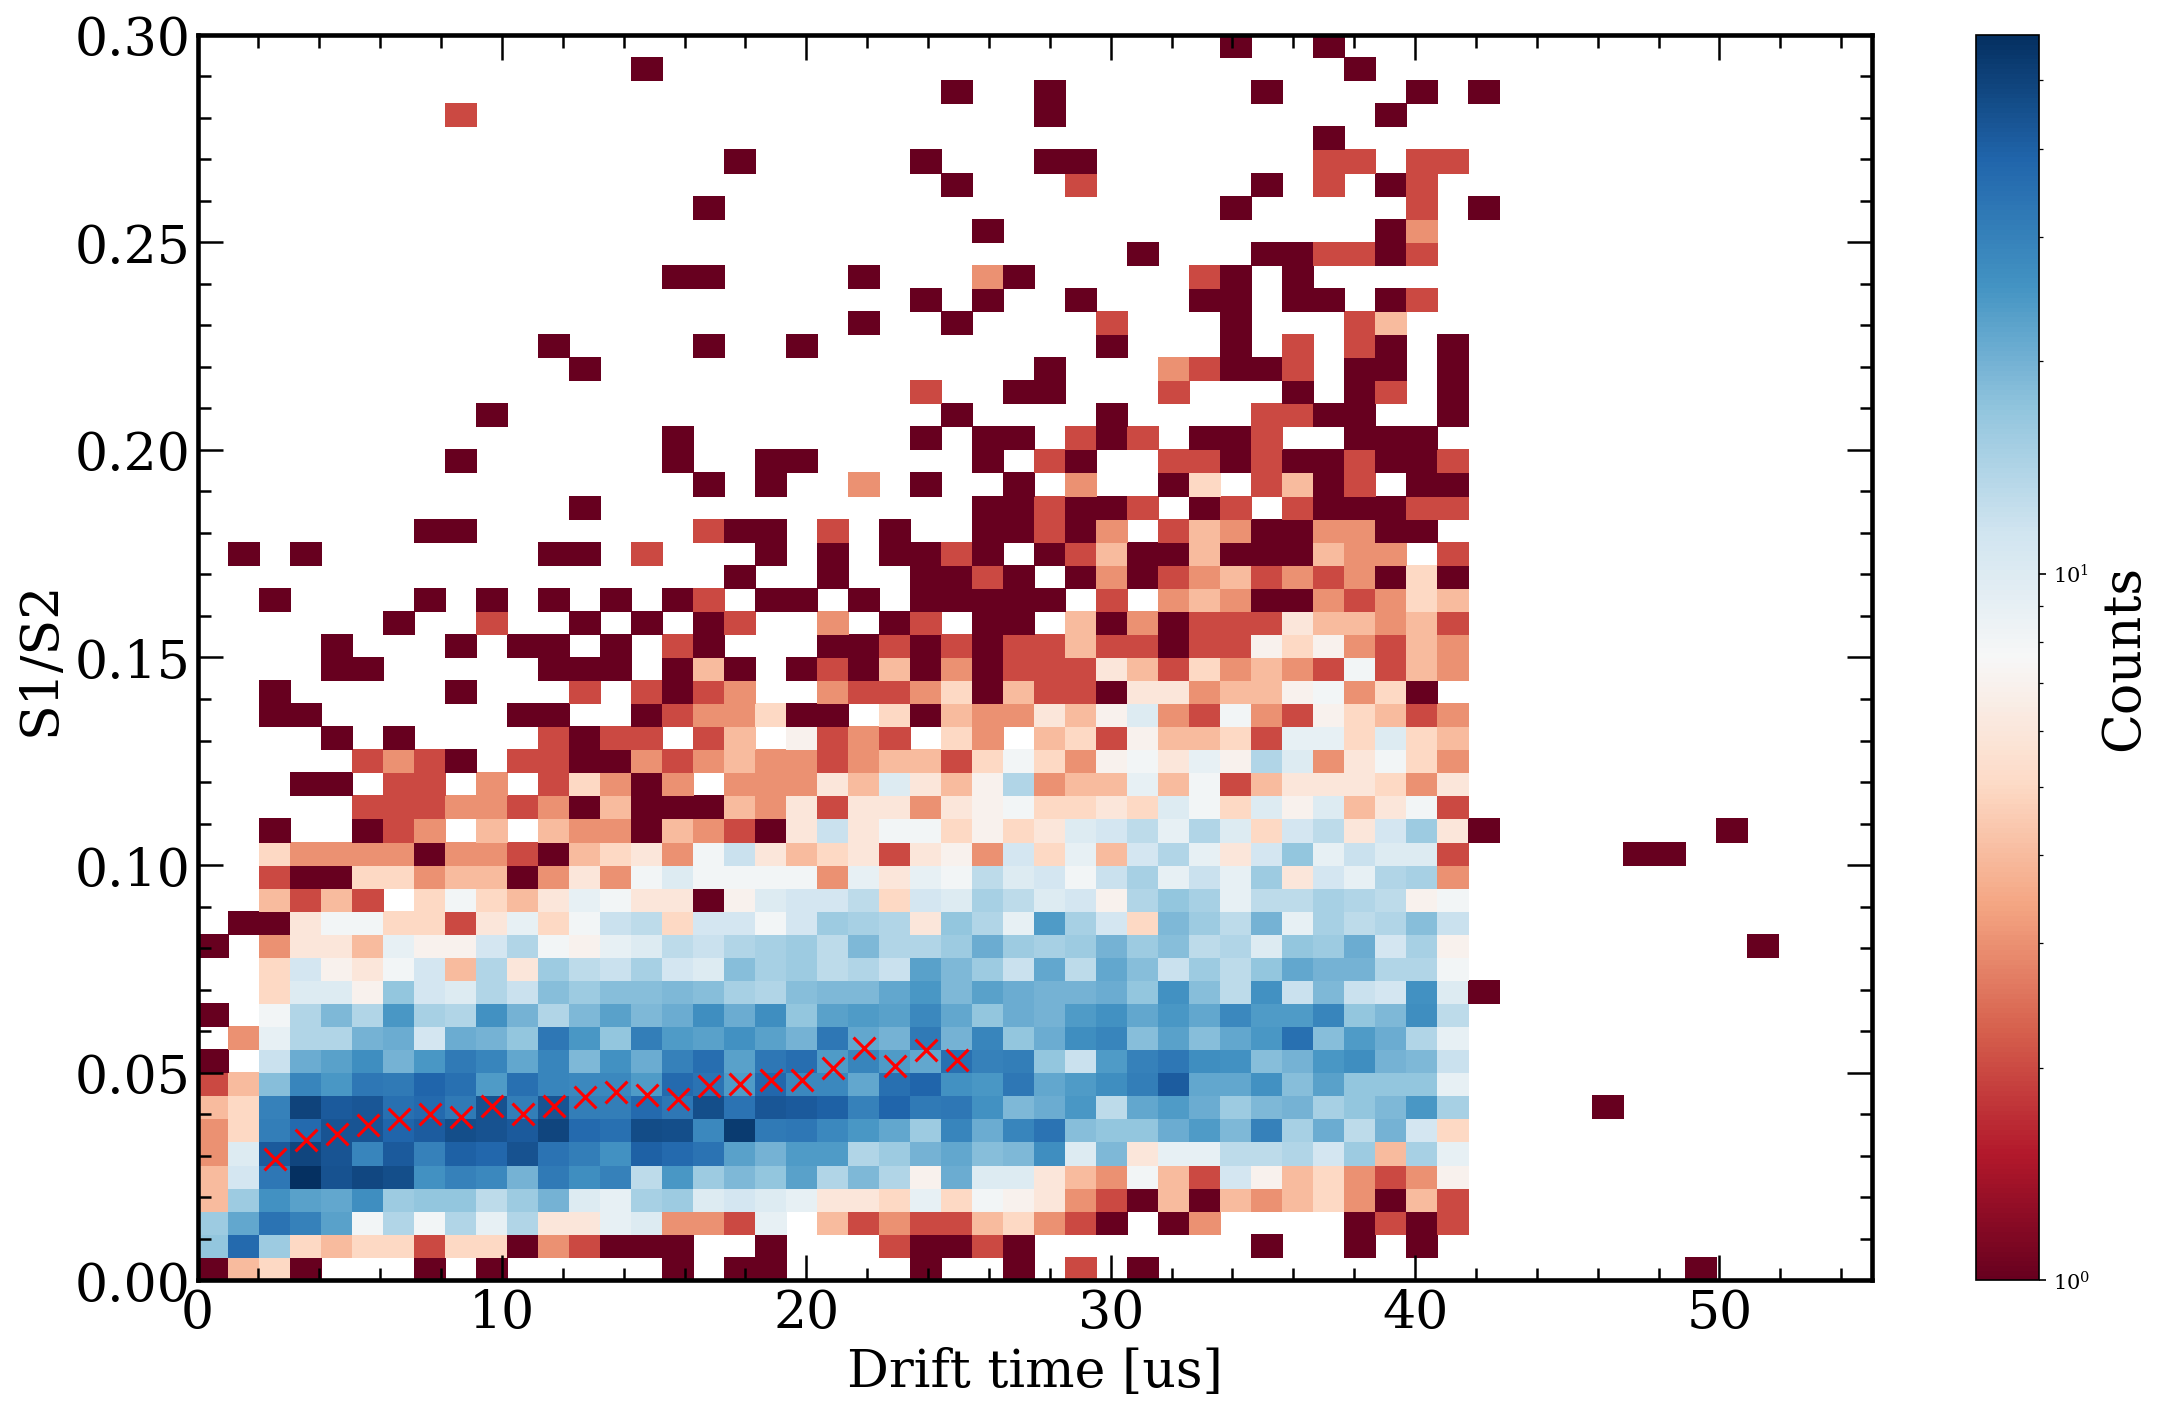

In [240]:
fig=plt.figure(figsize=(18, 11), dpi=150)

plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
   

label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both') 
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

bins_x = np.linspace(0,55,55)
bins_y = np.linspace(0,0.3,55)
counts, xedges, yedges = np.histogram2d(kr_s2_drifttime/1e3, S1_S2_ratio, bins=(bins_x, bins_y))

im = axes.pcolormesh(bins_x, bins_y, counts.T, norm=LogNorm(), cmap = 'RdBu')
plt.colorbar(im,ax=axes, label='Counts')

plt.scatter(xcenter[2:25], y_values, c = 'r', marker = 'x', s =110)

axes.set_xlabel('Drift time [us]')
axes.set_ylabel('S1/S2')
plt.show()

# Do this at once for all runs selected

In [ ]:
# import numpy as np
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# from matplotlib import colors
# from matplotlib.colors import LogNorm
# import math

# %matplotlib inline
# from scipy.optimize import curve_fit, minimize
# import strax
# import straxbra
# from matplotlib.ticker import AutoMinorLocator
# from matplotlib.image import NonUniformImage
# import pandas as pd

In [ ]:
#ctx = straxbra.XebraContext()

In [ ]:
#run_list = ['00201','00200','00199','00198','00197','00196','00195','00194','00193','00192']